In [11]:
import sys
if '/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon' not in sys.path:
    sys.path.insert(0, '/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon')
    
%load_ext autoreload
%autoreload 2

print("Python version:", sys.version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python version: 3.9.5 (default, Jun  4 2021, 12:28:51) 
[GCC 7.5.0]


# initial tests

In [12]:
from deepface import DeepFace
import pandas as pd
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', 100)

In [13]:
# df = DeepFace.find(img_path="../face_detection/test_images/test01.jpg", db_path="../face_detection/database")

In [14]:
# df

In [15]:
# import sys
# import os
# for item in sys.path:
#     print(item)
# print(os.getcwd())

## list of model names

- 'VGG-Face'
- 'OpenFace'
- 'Facenet'
- 'Facenet512'
- 'DeepFace'
- 'DeepID'
- 'Dlib'
- 'ArcFace'
- 'Emotion'
- 'Age'
- 'Gender'
- 'Race'

## list of detector names

- 'opencv': OpenCvWrapper.py
- 'ssd': SsdWrapper.py
- 'dlib': DlibWrapper.py
- 'mtcnn': MtcnnWrapper.py
- 'retinaface': RetinaFaceWrapper.py

## tests functions.load_image

In [16]:
from deepface.commons import functions
# import cv2
import matplotlib.pyplot as plt

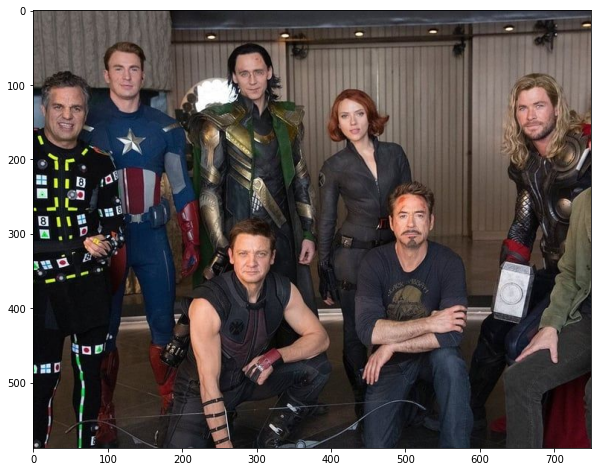

In [17]:
cv2_img = functions.load_image("../face_detection/test_images/test02.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])

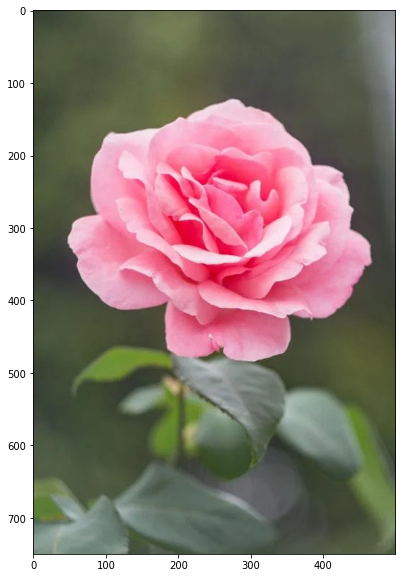

In [18]:
flower_img = functions.load_image("../face_detection/test_images/test_flower.jpg")
plt.figure(figsize=(10,10))
plt.imshow(flower_img[:, :, ::-1])

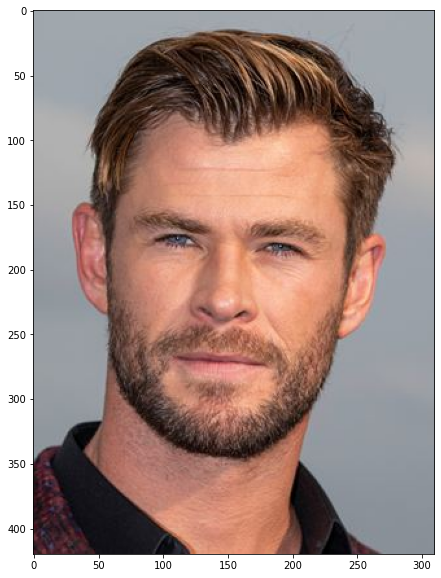

In [19]:
chris_img = functions.load_image("../face_detection/database/Chris_Hemsworth/test_chris.jpg")
plt.figure(figsize=(10,10))
plt.imshow(chris_img[:, :, ::-1])

**functions.load_image**: 
- inputs: the absolute path to an image
- returns: the BGR (cv2 format) uint8 numpy array representing the image

## tests OpenCvWrapper.detect_faces

In [20]:
from deepface.detectors import OpenCvWrapper

In [21]:
detected_face, region = OpenCvWrapper.detect_face(OpenCvWrapper.build_model(), cv2_img, align=True)

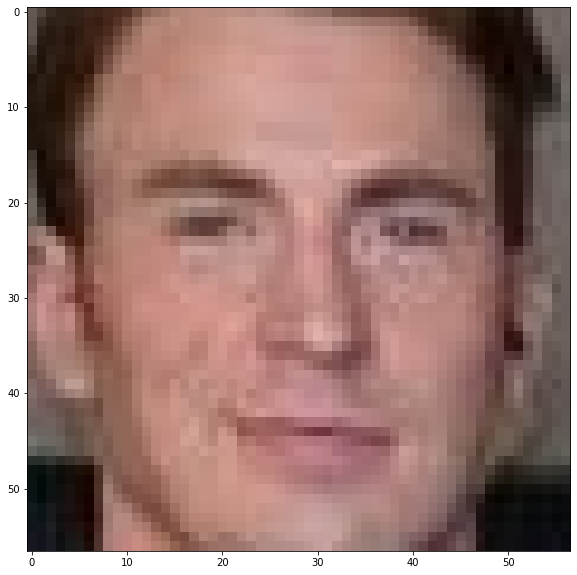

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(detected_face[:, :, ::-1])

In [23]:
region # x, y (from top left of image), w, h

[96, 57, 57, 57]

In [24]:
detected_faces_list, img_regions_list = OpenCvWrapper.detect_faces(OpenCvWrapper.build_model(), cv2_img, align=True)

In [25]:
len(img_regions_list)

7

In [26]:
# for face_img in detected_faces_list:
#     plt.figure(figsize=(5,5))
#     plt.imshow(face_img[:, :, ::-1])
#     plt.show()

In [27]:
type(cv2_img), cv2_img.dtype

(numpy.ndarray, dtype('uint8'))

**detectors.<>Wrapper**:
- input: built model, image array, align
- output: single face image array and region

gotta make the new function output a list of face images and regions

## tests functions.draw_boxes

In [ ]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list, color=(0,255,255))
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests FaceDetector.detect_faces

In [ ]:
from deepface.detectors import FaceDetector

In [ ]:
detected_faces_images, img_regions_list = FaceDetector.detect_faces(FaceDetector.build_model('opencv'), 'opencv', cv2_img)

In [ ]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list, color=(0,255,255))
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests functions.detect_faces

In [ ]:
detected_faces_images, img_regions_list = functions.detect_faces(cv2_img, detector_backend='opencv')

In [ ]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list)
plt.figure(figsize=(15,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(15,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests DeepFace.find_faces

In [51]:
df, cv2_img_boxes = DeepFace.find_faces(img_path="../face_detection/test_images/test_elon_musk.jpg", db_path="../face_detection/database", model_name='Facenet', detector_backend='mtcnn', verbose=True)
# df, cv2_img_boxes = DeepFace.find_faces(img_path="../face_detection/test_images/test_chris.jpg", db_path="../face_detection/database", distance_metric="cosine")

There are 92 representations found in representations_facenet_mtcnn.pkl
There are 11 faces found on test_elon_musk.jpg


Analyzing faces: 100%|██████████████████████████████████████████████| 11/11 [00:02<00:00,  4.64it/s]

find function lasts 5.247200012207031 seconds


In [52]:
df

,box,name,distance,best_match_path
0,"[336, 102, 13, 16]",NaN,NaN,NaN
1,"[425, 99, 14, 18]",NaN,NaN,NaN
2,"[172, 83, 13, 16]",NaN,NaN,NaN
3,"[366, 116, 14, 18]",NaN,NaN,NaN
4,"[475, 107, 13, 17]",NaN,NaN,NaN
5,"[274, 107, 12, 17]",NaN,NaN,NaN
6,"[79, 82, 16, 20]",NaN,NaN,NaN
7,"[126, 91, 12, 15]",NaN,NaN,NaN
8,"[96, 97, 14, 18]",NaN,NaN,NaN
9,"[535, 104, 11, 14]",NaN,NaN,NaN


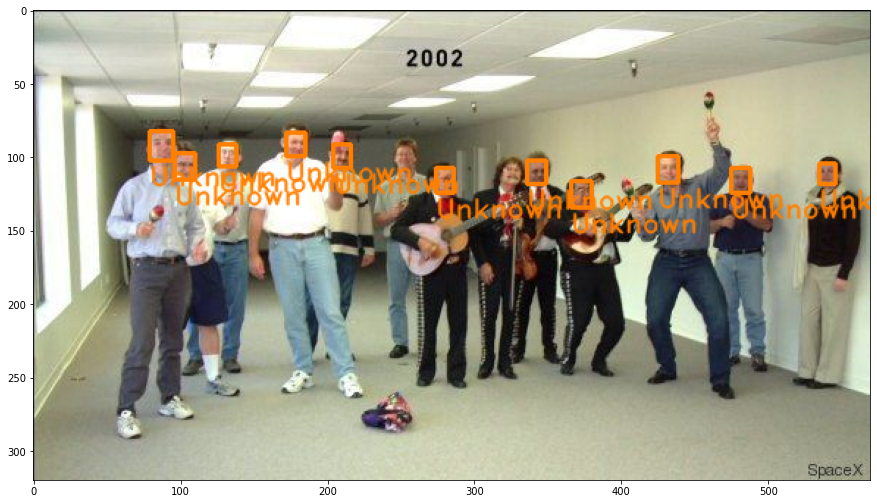

In [53]:
plt.figure(figsize=(15,15))
plt.imshow(cv2_img_boxes[:, :, ::-1])
plt.show()
# plt.figure(figsize=(15,15))
# plt.imshow(cv2_img[:, :, ::-1])
# plt.show()

In [ ]:
import time
import os
from pathlib import Path

In [ ]:
model = DeepFace.build_model('Facenet')

tic = time.time()

for detector_backend in ["opencv", "dlib", "mtcnn", "retinaface"]: # ssd doesn't work
    df, cv2_img_boxes = DeepFace.find_faces(img_path="../face_detection/test_images/test2.jpg", db_path="../face_detection/database", model_name='Facenet', model=model, detector_backend=detector_backend, verbose=True)
    
    toc = time.time()
    print(detector_backend, "=>", toc - tic, "seconds")
    
    display(df)
    plt.figure(figsize=(15,15))
    plt.imshow(cv2_img_boxes[:, :, ::-1])
    plt.show()

In [ ]:
tests_path = Path.cwd() / "../face_detection/test_images"
tests_path = tests_path.resolve()
# print(tests_path.is_dir())

root, dirs, files = next(os.walk(tests_path))

model = DeepFace.build_model('Facenet')
for test_image in files:
    print("Analyzing image", test_image)
    df, cv2_img_boxes = DeepFace.find_faces(img_path=root+"/"+test_image, db_path="../face_detection/database", model_name='Facenet', model=model, detector_backend='mtcnn', verbose=True)
    display(df)
    plt.figure(figsize=(15,15))
    plt.imshow(cv2_img_boxes[:, :, ::-1])
    plt.show()

## tests SsdWrapper.detect_faces

In [ ]:
from deepface.detectors import SsdWrapper

In [ ]:
detected_faces_images, img_regions_list = SsdWrapper.detect_faces(SsdWrapper.build_model(), cv2_img, align=True)

In [ ]:
# for image in detected_faces_images:
#     plt.figure(figsize=(5,5))
#     plt.imshow(image[:, :, ::-1])
#     plt.show()

In [ ]:
img_regions_list

In [ ]:
detections_df = SsdWrapper.detect_faces(SsdWrapper.build_model(), flower_img, align=True)

In [ ]:
detections_df

## tests DlibWrapper.detect_faces

In [ ]:
from deepface.detectors import DlibWrapper
import dlib

In [ ]:
detector = dlib.get_frontal_face_detector()
detector?

In [ ]:
dlib.get_face_chip?

In [ ]:
detected_faces_images, img_regions_list = DlibWrapper.detect_faces(DlibWrapper.build_model(), cv2_img, align=True)

In [ ]:
for face_img in detected_faces_images:
    plt.figure(figsize=(5,5))
    plt.imshow(face_img[:, :, ::-1])
    plt.show()

In [ ]:
img_regions_list

## tests MtcnnWrapper.detect_faces

In [ ]:
from deepface.detectors import MtcnnWrapper

In [ ]:
detected_faces_images, img_regions_list = MtcnnWrapper.detect_faces(MtcnnWrapper.build_model(), cv2_img, align=True)

In [ ]:
for face_img in detected_faces_images:
    plt.figure(figsize=(5,5))
    plt.imshow(face_img[:, :, ::-1])
    plt.show()

## tests RetinaFaceWrapper.detect_faces

In [ ]:
from deepface.detectors import RetinaFaceWrapper
from retinaface import RetinaFace

In [ ]:
detected_faces_images, img_regions_list  = RetinaFaceWrapper.detect_faces(RetinaFaceWrapper.build_model(), cv2_img, align=True)

In [ ]:
for face_img in detected_faces_images:
    plt.figure(figsize=(5,5))
    plt.imshow(face_img[:, :, ::-1])
    plt.show()

## tests DeepFace.load_representations

In [46]:
model_name = 'Facenet'
verbose = True
detector_backend = 'mtcnn'
db_path = "../face_detection/database"
model = DeepFace.build_model(model_name=model_name)

In [42]:
representations = DeepFace.load_representations(db_path=db_path, model_name=model_name, model=model, detector_backend=detector_backend, verbose=verbose)

load_representations is called
There are 92 representations found in representations_facenet_mtcnn.pkl


In [43]:
df, cv2_img_boxes = DeepFace.find_faces(
    img_path="../face_detection/test_images/test01.jpg",
    db_path=db_path,
    model_name=model_name,
    distance_metric='cosine',
    model=model,
    representations=representations,
    verbose=verbose
)

Already built model is passed
There are 1 faces found on test01.jpg


Analyzing faces: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.23it/s]

find function lasts 0.4028465747833252 seconds


In [44]:
df

,box,name,distance,best_match_path
0,"[160, 210, 707, 707]",NaN,NaN,NaN


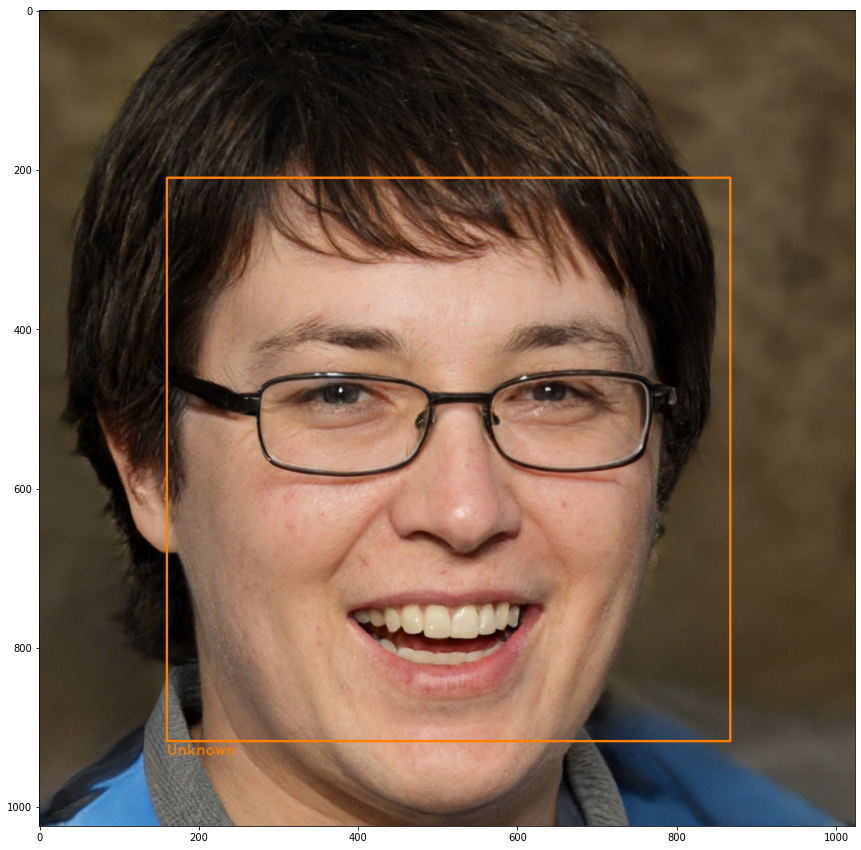

In [45]:
plt.figure(figsize=(15,15))
plt.imshow(cv2_img_boxes[:, :, ::-1])
plt.show()

# Django

## notes

- `django-admin startproject <project_name>` to start a project
- `django-admin runserver` doesn't work, use `python manage.py runserver` instead
- create an application: `python manage.py startapp <app_name>`
- application has urls in app_name/urls.py (import urls on main project urls with include), connected to view functions in views.py
- the views get the requests, process it and send back the response (JSON or HTML)
- the app has access to tables in a database, in models.py
- the views can interact with the tables in models.py directly
- every changes in the models are recorded in migrations, apply migrations/changes with:
    - `python manage.py makemigrations`
    - `python manage.py migrate`
- clear all inputs in the database: `python manage.py flush`
- sqlite is capable of storing images
- Pillow is necessary to upload images with sqlite

# DUMP

string positional formatting
- string: `%s`
- single character: `%c`
- rounded decimal: `%.2f`
- signed integer: `%i` or `%d`
- convert to hexadecimal: `%04x` lowercase, `%04X` uppercase
- scientific notation: `%.2e` lowercase, `%.2E` uppercase

In [ ]:
"test: %.2e" % 15000

In [ ]:
from pathlib import Path
import os

In [ ]:
str(Path.home())

In [ ]:
r, d, f = next(os.walk(Path.cwd()))
f[0]

In [ ]:
(Path.cwd() / d[0]).is_dir()

In [ ]:
(Path.cwd() / f[0]).is_file()

In [ ]:
[1,2] + 3